# Data Cleaning, EDA & Data Visualization

### Data Cleaning

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Read data
df = pd.read_csv('../datasets/posts.csv')
df.head()

,subreddit,title
0,wallstreetbets,You all should try to SPAC Jeremy Fragrance's ...
1,wallstreetbets,Are you ready for marriage love test
2,wallstreetbets,Serious question: Is it too late to buy in now?
3,wallstreetbets,Need some advice...
4,wallstreetbets,tin foil hat time! Is Vlad really that stupid?


In [3]:
# Check shape
df.shape

(3821, 2)

In [4]:
# Check missing values
df.isnull().sum()

subreddit    0
title        0
dtype: int64

In [5]:
# Check dtypes
df.dtypes

subreddit    object
title        object
dtype: object

In [6]:
# Create a column for character length of post
df['post_char_length'] = df['title'].apply(len)
df.head(3)

,subreddit,title,post_char_length
0,wallstreetbets,You all should try to SPAC Jeremy Fragrance's ...,53
1,wallstreetbets,Are you ready for marriage love test,36
2,wallstreetbets,Serious question: Is it too late to buy in now?,47


In [7]:
# Create a column for post word count
df['post_word_count'] = df['title'].map(lambda x: len(x.split()))
df.head(3)

,subreddit,title,post_char_length,post_word_count
0,wallstreetbets,You all should try to SPAC Jeremy Fragrance's ...,53,9
1,wallstreetbets,Are you ready for marriage love test,36,7
2,wallstreetbets,Serious question: Is it too late to buy in now?,47,10


In [8]:
# Instantiate sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Create a column for the following sentiment analysis scores:
# negative, neutral, positive, and compound
df['sentiment_compound'] = df['title'].map(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_negative'] = df['title'].map(lambda x: sia.polarity_scores(x)['neg'])
df['sentiment_neutral'] = df['title'].map(lambda x: sia.polarity_scores(x)['neu'])
df['sentiment_positive'] = df['title'].map(lambda x: sia.polarity_scores(x)['pos'])

# Check code execution
df.head(3)

,subreddit,title,post_char_length,post_word_count,sentiment_compound,sentiment_negative,sentiment_neutral,sentiment_positive
0,wallstreetbets,You all should try to SPAC Jeremy Fragrance's ...,53,9,0.0000,0.000,1.000,0.000
1,wallstreetbets,Are you ready for marriage love test,36,7,0.7717,0.000,0.427,0.573
2,wallstreetbets,Serious question: Is it too late to buy in now?,47,10,-0.0772,0.126,0.874,0.000


### Exploratory Data Analysis & Data Visualization

In [9]:
# Check normalized value counts
df['subreddit'].value_counts(normalize=True)

SatoshiStreetBets    0.502748
wallstreetbets       0.497252
Name: subreddit, dtype: float64

In [10]:
# Sentiment analysis of the word 'wallstreetbets' - neutral
sia.polarity_scores('wallstreetbets')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [11]:
# Sentiment analysis of the word 'SatoshiStreetBets' - neutral
sia.polarity_scores('SatoshiStreetBets')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

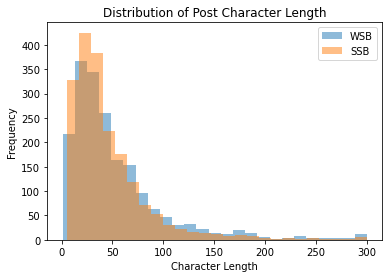

In [12]:
# Histogram of post character length
plt.title('Distribution of Post Character Length')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.hist(x=df[df['subreddit']=='wallstreetbets']['post_char_length'],
         bins=25, alpha=0.5, label='WSB')
plt.hist(x=df[df['subreddit']=='SatoshiStreetBets']['post_char_length'],
         bins=25, alpha=0.5, label='SSB')
plt.legend();

**Interpretation:** The distribution of post character length is skewed to the right for both WSB and SSB. Both subreddits have a similar distribution.

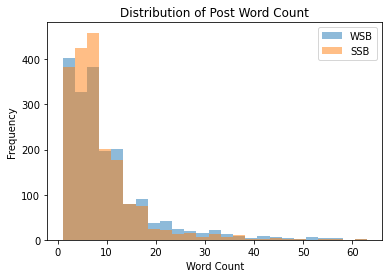

In [13]:
# Histogram of post word count
plt.title('Distribution of Post Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.hist(x=df[df['subreddit']=='wallstreetbets']['post_word_count'],
         bins=25, alpha=0.5, label='WSB')
plt.hist(x=df[df['subreddit']=='SatoshiStreetBets']['post_word_count'],
         bins=25, alpha=0.5, label='SSB')
plt.legend();

**Interpretation:** The distribution of post word count is skewed to the right for both WSB and SSB. Both subreddits have a similar distribution.

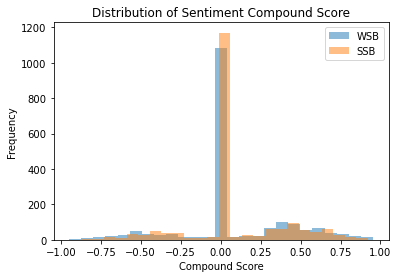

In [14]:
# Histogram of sentiment compound score
plt.title('Distribution of Sentiment Compound Score')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.hist(x=df[df['subreddit']=='wallstreetbets']['sentiment_compound'],
         bins=25, alpha=0.5, label='WSB')
plt.hist(x=df[df['subreddit']=='SatoshiStreetBets']['sentiment_compound'],
         bins=25, alpha=0.5, label='SSB')
plt.legend();

**Interpretation:** Both subreddits have mostly neutral posts. The frequency of positive compound scores seems to outweigh that of negative compound scores.

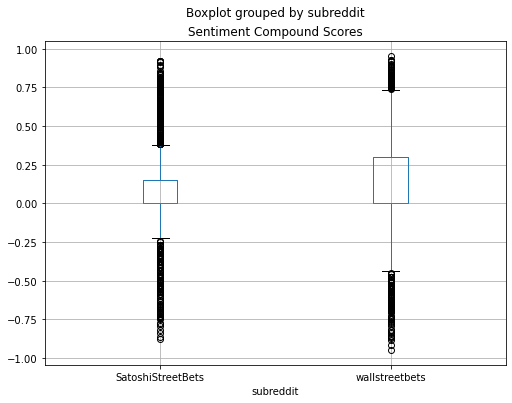

In [15]:
# Boxplot for sentiment compound scores
df.boxplot('sentiment_compound', by='subreddit', figsize=(8,6))
plt.title('Sentiment Compound Scores');

**Interpretation:** SSB appears to have the most outliers in both the upper and lower bounds, which means that there are a lot of unusually positive and negative posts. The range of compound scores is higher for WSB, which means that post sentiment is more widely spread out for WSB.

In [16]:
# Average sentiment of WSB
print(df[df['subreddit']=='wallstreetbets'][['sentiment_compound']].mean())
print(df[df['subreddit']=='wallstreetbets'][['sentiment_negative']].mean())
print(df[df['subreddit']=='wallstreetbets'][['sentiment_neutral']].mean())
print(df[df['subreddit']=='wallstreetbets'][['sentiment_positive']].mean())

sentiment_compound    0.075297
dtype: float64
sentiment_negative    0.050214
dtype: float64
sentiment_neutral    0.845091
dtype: float64
sentiment_positive    0.102061
dtype: float64


In [17]:
# Average sentiment of SSB
print(df[df['subreddit']=='SatoshiStreetBets'][['sentiment_compound']].mean())
print(df[df['subreddit']=='SatoshiStreetBets'][['sentiment_negative']].mean())
print(df[df['subreddit']=='SatoshiStreetBets'][['sentiment_neutral']].mean())
print(df[df['subreddit']=='SatoshiStreetBets'][['sentiment_positive']].mean())

sentiment_compound    0.068435
dtype: float64
sentiment_negative    0.046783
dtype: float64
sentiment_neutral    0.859415
dtype: float64
sentiment_positive    0.093802
dtype: float64


**Interpretation:** WSB and SSB have similar average sentiment compound scores. WSB seems to have a slightly more positive compound score than SSB. The difference in average sentiment compound scores appears to be negligible, but hypothesis testing would have to be performed to verify the statistical significance in the population means.

In [18]:
# Count the most commonly used words for WSB

# Define X
X = df[df['subreddit']=='wallstreetbets']['title']

# Instantiate a CV object
cv = CountVectorizer(stop_words='english')

# Fit the CV on posts
cv.fit(X)

# Transform data
X_cv = cv.transform(X)

# Convert to a dataframe
cv_df = pd.DataFrame(X_cv.todense(),columns=cv.get_feature_names())

# Create a WSB dataframe containing the 100 most common words and word count
wsb_cv_df = pd.DataFrame(data=cv_df.sum().sort_values(ascending=False).head(100),
                        columns=['word_count'])

# Change index to a column
wsb_cv_df.reset_index(inplace=True)
wsb_cv_df = wsb_cv_df.rename(columns={'index':'word'})

# Save wsb_cv_df to csv
wsb_cv_df.to_csv('../datasets/wsb_words.csv', index=False)

# Check code execution
wsb_cv_df.head()

,word,word_count
0,gme,336
1,amc,119
2,moon,113
3,stock,94
4,apes,78


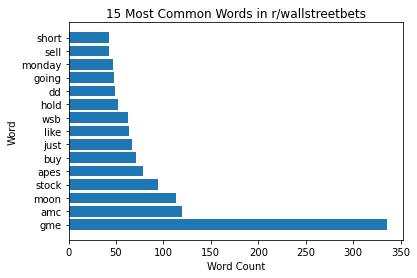

In [19]:
# Bar chart of 15 most commonly seen words in WSB
plt.barh(y=wsb_cv_df['word'].head(15), width=wsb_cv_df['word_count'].head(15))
plt.title('15 Most Common Words in r/wallstreetbets')
plt.xlabel('Word Count')
plt.ylabel('Word');

In [20]:
# Count the most commonly used words for SSB

# Define X
X = df[df['subreddit']=='SatoshiStreetBets']['title']

# Instantiate a CV object
cv = CountVectorizer(stop_words='english')

# Fit the CV on posts
cv.fit(X)

# Transform data
X_cv = cv.transform(X)

# Convert to a dataframe
cv_df = pd.DataFrame(X_cv.todense(),columns=cv.get_feature_names())

# Create a SSB dataframe containing the 100 most common words and word count
ssb_cv_df = pd.DataFrame(data=cv_df.sum().sort_values(ascending=False).head(100),
                        columns=['word_count'])

# Change index to a column
ssb_cv_df.reset_index(inplace=True)
ssb_cv_df = ssb_cv_df.rename(columns={'index':'word'})

# Save ssb_cv_df to csv
ssb_cv_df.to_csv('../datasets/ssb_words.csv', index=False)

# Check code execution
ssb_cv_df.head()

,word,word_count
0,ada,159
1,crypto,138
2,coin,101
3,buy,92
4,moon,72


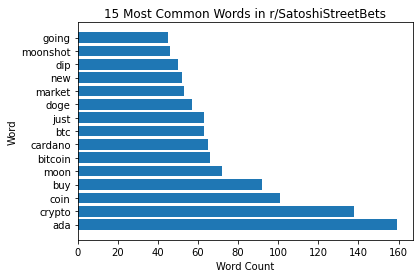

In [21]:
# Bar chart of 15 most commonly seen words in SSB
plt.barh(y=ssb_cv_df['word'].head(15), width=ssb_cv_df['word_count'].head(15))
plt.title('15 Most Common Words in r/SatoshiStreetBets')
plt.xlabel('Word Count')
plt.ylabel('Word');

In [22]:
# Find matches for the 100 most common words in WSB and SSB
common_words = []
for word in wsb_cv_df['word']:
    if word in list(ssb_cv_df['word']):
        common_words.append(word)
print(len(common_words))
print(sorted(common_words))

41
['10', '2021', 'amp', 'big', 'bought', 'buy', 'buying', 'day', 'did', 'dip', 'don', 'going', 'good', 'got', 'guys', 'help', 'hold', 'holding', 'just', 'know', 'let', 'like', 'long', 'make', 'market', 'monday', 'money', 'moon', 'new', 'news', 'people', 'price', 'right', 'short', 'think', 'time', 'today', 'trading', 've', 'way', 'yolo']


In [23]:
# Match percent calculation
len(common_words)/100

0.41

**Interpretation:** Of the 100 most commonly found words in the WSB and SSB subreddits, 41 words are shared between the two. A 41% match is high and indicates that a lot of terminology is common to users of both subreddits. This may limit the accuracy of any predictive models built to distinguish the two subreddits.

In [24]:
# 100 most common words in WSB unique to WSB
wsb_words_only = []
for word in wsb_cv_df['word']:
    if word not in common_words:
        wsb_words_only.append(word)
print(len(wsb_words_only))
print(sorted(wsb_words_only))

59
['account', 'advice', 'amc', 'ape', 'apes', 'app', 'bb', 'calls', 'cciv', 'coming', 'dd', 'diamond', 'does', 'fellow', 'financial', 'fuck', 'game', 'gamestop', 'gme', 'goes', 'gonna', 'hands', 'hedge', 'life', 'line', 'lucid', 'march', 'melvin', 'meme', 'need', 'options', 'post', 'real', 'retards', 'robinhood', 'sec', 'sell', 'shares', 'shit', 'sign', 'sos', 'squeeze', 'stimulus', 'stock', 'stocks', 'stop', 'street', 'strong', 'tendies', 'trying', 'use', 'using', 'video', 'wall', 'wallstreetbets', 'want', 'week', 'weeks', 'wsb']


**Interpretation:** The above 59 words are unique to WSB's top 100 most common words list, but that doesn't mean these words are not found in SSB posts. They are simply just not the most common words in SSB.

In [25]:
# 100 most common words in SSB unique to SSB
ssb_words_only = []
for word in ssb_cv_df['word']:
    if word not in common_words:
        ssb_words_only.append(word)
print(len(ssb_words_only))
print(sorted(ssb_words_only))

59
['100', 'ada', 'best', 'bitcoin', 'bnb', 'bsc', 'btc', 'btt', 'bull', 'cap', 'cardano', 'check', 'coin', 'coinbase', 'coins', 'crash', 'cro', 'crypto', 'days', 'doge', 'dogecoin', 'elon', 'eth', 'exchange', 'free', 'future', 'gains', 'great', 'high', 'investment', 'join', 'kucoin', 'listed', 'look', 'looking', 'love', 'low', 'million', 'moonshot', 'musk', 'network', 'opportunity', 'portfolio', 'potential', 'project', 'pump', 'ready', 'sale', 'staking', 'start', 'stc', 'term', 'thoughts', 'token', 'usd', 'value', 'vet', 'wallet', 'xrp']


**Interpretation:** The above 59 words are unique to SSB's top 100 most common words list, but again, it is possible for them to appear in WSB posts. These shared terminologies are likely to impact performance on predictive models.

In [26]:
# Create a shared common words dataframe
common_words_df = pd.DataFrame(data=common_words, columns=['shared_common_words'])
common_words_df.head()

,shared_common_words
0,moon
1,buy
2,just
3,like
4,hold


In [27]:
# Create a dictionary for WSB word count
wsb_shared_word_count = {}
for word in common_words_df['shared_common_words']:
    index = 0
    for w in wsb_cv_df['word']:
        if word == w:
            wsb_shared_word_count[word] = wsb_cv_df['word_count'][index]
        index += 1

In [28]:
# Create a new column with WSB word count
common_words_df['wsb_word_count'] = common_words_df['shared_common_words'].map(wsb_shared_word_count)

# Check code execution
common_words_df.head()

,shared_common_words,wsb_word_count
0,moon,113
1,buy,71
2,just,67
3,like,64
4,hold,52


In [29]:
# Create a dictionary for SSB word count
ssb_shared_word_count = {}
for word in common_words_df['shared_common_words']:
    index = 0
    for w in ssb_cv_df['word']:
        if word == w:
            ssb_shared_word_count[word] = ssb_cv_df['word_count'][index]
        index += 1

In [30]:
# Create a new column with SSB word count
common_words_df['ssb_word_count'] = common_words_df['shared_common_words'].map(ssb_shared_word_count)

# Create a new column for total word count
common_words_df['total_word_count'] = common_words_df['wsb_word_count'] + common_words_df['ssb_word_count']

# Check code execution
common_words_df.head(5)

,shared_common_words,wsb_word_count,ssb_word_count,total_word_count
0,moon,113,72,185
1,buy,71,92,163
2,just,67,63,130
3,like,64,34,98
4,hold,52,17,69


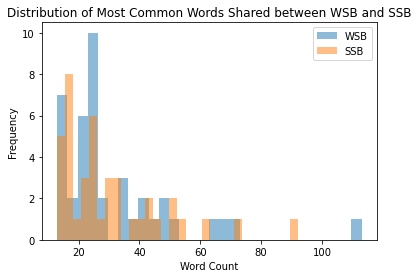

In [31]:
# Histogram of 41 most common words shared between WSB and SSB
plt.title('Distribution of Most Common Words Shared between WSB and SSB')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.hist(x=common_words_df['wsb_word_count'],
         bins=30, alpha=0.5, label='WSB')
plt.hist(x=common_words_df['ssb_word_count'],
         bins=30, alpha=0.5, label='SSB')
plt.legend();

**Interpretation:** The distribution of the 41 most common words shared between WSB and SSB are shown here. As expected, the distribution is somewhat different for the two subreddits.

In [32]:
# Save common_words_df to csv
common_words_df.to_csv('../datasets/shared_words.csv', index=False)

# Check code execution
len(common_words_df)

41

In [33]:
# Drop shared words from wsb_cv_df (use in word cloud)
for w in wsb_cv_df['word']:
    if w not in wsb_words_only:
        subset = wsb_cv_df.loc[wsb_cv_df['word'] == w]
        wsb_cv_df.drop(index=subset.index, inplace=True)

# Overwrite saved file
wsb_cv_df.to_csv('../datasets/wsb_words.csv', index=False)
        
# Check code execution
len(wsb_cv_df)

59

In [34]:
# Drop shared words from ssb_cv_df (use in word cloud)
for s in ssb_cv_df['word']:
    if s not in ssb_words_only:
        subset = ssb_cv_df.loc[ssb_cv_df['word'] == s]
        ssb_cv_df.drop(index=subset.index, inplace=True)

# Overwrite saved file
ssb_cv_df.to_csv('../datasets/ssb_words.csv', index=False)
        
# Check code execution
len(ssb_cv_df)

59

In [35]:
# Save cleaned posts as csv file
df.to_csv('../datasets/cleaned_posts.csv', index=False)